## Get data from https://fundamentus.com.br/detalhes.php?papel=<papel> and then store values on a python datashhet

# Read Position

In [1]:
#conda activate base
import pandas as pd

# Lê o arquivo Excel
path = "/home/ponche/projects/ibox/b3/"
#fileName = "posicao-2025-12-06-15-13-40.xlsx"
fileName = "posicao-2026-01-19-09-55-21.xlsx"
file = path + fileName
print (file)
df_posicao = pd.read_excel(file, sheet_name='Acoes', header=0, skiprows=0, nrows=300)
#df_posicao = pd.read_excel(file, sheet_name='Posição - Ações', header=0, skiprows=0, nrows=300)

#print(df_posicao.columns)
#print(df_posicao['Código de Negociação'])
df_posicao = df_posicao.dropna(subset=['Código de Negociação'])

df_posicao['Percentual'] = df_posicao['Valor Atualizado'] / df_posicao['Valor Atualizado'].sum()


/home/ponche/projects/ibox/b3/posicao-2026-01-19-09-55-21.xlsx


/home/ponche/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Create a function to get tiker data

In [2]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import math

def converter_float(texto):
    texto = texto.replace(",", ".")
    if texto.endswith("%"):
        texto = texto[:-1]  # remove o símbolo de porcentagem
        if texto != 0:
            return float(texto) / 100
        else:
            return 0
    else:
        try:
            return float(texto)
        except ValueError:
            return 0

def get_ticker_data(ticker, df):
    # Create a new Chrome browser instance
    driver = webdriver.Chrome()
    

    tk = ticker['Código de Negociação']
    percentual = ticker['Percentual']
    # Go to the Python.org website
    driver.get(f"https://fundamentus.com.br/detalhes.php?papel={tk}")

    # Wait for the page to load (not recommended for robust scripts)
    time.sleep(.2)

    # Find the search bar element by its name attribute
    SETOR = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[4]/td[2]/span/a").text
    #SUBSETOR = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[4]/td[2]/span/a").text

    #TIKER = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[1]/td[2]/span").text
    COTACAO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[1]/tbody/tr[1]/td[4]/span").text)

    PL = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[2]/td[4]/span").text)
    LPA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[2]/td[6]/span").text)

    P_V = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[3]/td[4]/span").text)
    VPA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[3]/td[6]/span").text)

    P_EBIT = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[4]/td[4]/span").text)
    MARGEM_BRUTA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[4]/td[6]/span").text)

    PSR = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[5]/td[4]/span").text)
    MARGEM_EBITDA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[5]/td[6]/span").text)

    P_ATIVOS = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[6]/td[4]/span").text)
    MARGEM_LIQUIDA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[6]/td[6]/span").text)

    CAP_GIRO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[7]/td[4]/span").text)
    EBIT_ATIVO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[7]/td[6]/span").text)

    ATIVO_CIRCUL_LIQU = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[8]/td[4]/span").text)
    ROIC = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[8]/td[6]/span").text)

    DIV_YELD = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[9]/td[4]/span").text)
    ROE = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[9]/td[6]/span").text)

    EV_EBITIDA = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[10]/td[4]/span").text)
    LIQUIDES_CORR = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[10]/td[6]/span").text)

    EV_EBIT = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[11]/td[4]/span").text)
    DIV_PATRIMONIO = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[11]/td[6]/span").text)

    CRES_REC_5A = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[12]/td[4]/span").text)
    GIRO_ATIVOS = converter_float(driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/table[3]/tbody/tr[12]/td[6]/span").text)

    resultado = 22.5 * float(LPA) * float(VPA)
    if resultado >= 0:
        PRECO_JUSTO = math.sqrt(resultado)
    else:
        PRECO_JUSTO = 0  # ou algum outro valor que faça sentido para o seu caso

    lineData = {
#        'TIKER': [tk], 'SETOR' : [SETOR], SUBSETOR: [SUBSETOR], 'COTACAO': [COTACAO], 
        'TIKER': [tk], 'SETOR' : [SETOR], 'COTACAO': [COTACAO], 
        'PERCENTUAL' : [percentual], 'PRECO_JUSTO' : [PRECO_JUSTO],
        'PL': [PL], 'LPA': [LPA],
        'P_V': [P_V], 'VPA': [VPA],
        'P_EBIT': [P_EBIT], 'MARGEM_BRUTA': [MARGEM_BRUTA],
        'PSR': [PSR], 'MARGEM_EBITDA': [MARGEM_EBITDA],
        'P_ATIVOS': [P_ATIVOS], 'MARGEM_LIQUIDA': [MARGEM_LIQUIDA],
        'CAP_GIRO': [CAP_GIRO], 'EBIT_ATIVO': [EBIT_ATIVO],
        'ATIVO_CIRCUL_LIQU': [ATIVO_CIRCUL_LIQU], 'ROIC': [ROIC],
        'DIV_YELD': [DIV_YELD], 'ROE': [ROE],
        'EV_EBITIDA': [EV_EBITIDA], 'LIQUIDES_CORR': [LIQUIDES_CORR],
        'EV_EBIT': [EV_EBIT], 'DIV_PATRIMONIO': [DIV_PATRIMONIO],
        'CRES_REC_5A': [CRES_REC_5A], 'GIRO_ATIVOS': [GIRO_ATIVOS]
    }

    libeDF = pd.DataFrame(lineData)

    libeDF['DIFERENCA'] = libeDF['PRECO_JUSTO'] - libeDF['COTACAO'] 
    
    # Append the new data to the existing dataframe
    df = pd.concat([df, libeDF], ignore_index=True)

    # Close the browser window
    driver.quit()

    return df

## Example usage:
#df = pd.DataFrame()
#df = get_ticker_data('PETR4', df)
#print(df)

# Loop function in all b3 tikers to create a DataFrame

In [3]:
#tickers = df_posicao['Código de Negociação']

tickers = [
#   "AALR3", "ABCB4", "ABEV3", "AERI3", "AGRO3", "ALOS3", "ALPA4"
#   ,"AMAR3", "AZZA3", "ASAI3", "AURE3", "AZUL4", "B3SA3", "BBAS3", 
#    "BBDC4", "BBSE3", "BEEF3", "BHIA3", "BIOM3", "BLAU3", "BPAN4", 
#   "BRAP4", "BRFS3", "BRKM5", "BRSR6", "CAML3", "CASH3", "CBAV3", 
#   "CEAB3", "CIEL3", "CLSA3", "CMIG3", "CMIG4", "CMIN3", 
#   "COGN3", "CPFE3", "CPLE3", "CPLE6", "CRFB3", "CSAN3", "CSMG3", "CSNA3", 
#   "CURY3", "CVCB3", "CXSE3", "CYRE3", "DEXP3", "DIRR3", "DXCO3", "ECOR3", 
#   "EGIE3", "AXIA3", "EMBJ3", "ENAT3", "ENEV3", "EQTL3", "ESPA3", 
#   "EVEN3", "EZTC3", "FESA4", "FLRY3", "FRAS3", "GGBR4", "GOAU4", "GOLL4", 
#   "GRND3", "GMAT3", "GUAR3", "HAPV3", "HBSA3", "HYPE3", "IFCM3", "INTB3", 
#   "IRBR3", "ITSA4", "ITUB3", "ITUB4", "JBSS3", "JHSF3", "KEPL3",  
#   "LAVV3", "LEVE3", "LIGT3", "LOGG3", "LOGN3", "LREN3", "LWSA3", "MATD3", 
#   "MDIA3", "MEAL3", "MGLU3", "MILS3", "MLAS3", "MOVI3", "MBRF3", "MRVE3", 
#   "MULT3", "MYPK3", "NEOE3", "NTCO3", "ODPV3", "ONCO3", "ORVR3",  
#   "PCAR3", "PETR3", "PETR4", "PETZ3", "PLAS3", "POMO4", "POSI3", 
#   "PRIO3", "PRNR3", "PSSA3", "QUAL3", "RADL3", "RAIL3", "RAIZ4", "RANI3", 
#   "RAPT4", "RDOR3", "RECV3", "RENT3", "ROMI3",  "SBSP3", "SEQL3", 
#   "SHUL4", "SIMH3", "SLCE3", "SMFT3", "SMTO3", "STBP3", "SUZB3", "SYNE3", 
#   "TASA4", "TEND3", "TESA3", "TIMS3", "TOTS3",  "TTEN3", "TUPY3", 
#   "UCAS3", "UGPA3", "UNIP6", "USIM5", "VALE3", "VAMO3", "VBBR3", "VITT3", 
#   "VIVT3", "VLID3", "VULC3", "WEGE3", "WIZC3", "YDUQ3", "ZAMP3"
]

df = pd.DataFrame()  # Initialize an empty dataframe

print (time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))

for tk in tickers:
    tk_dict = {'Código de Negociação': tk, 'Percentual': 0}
    df = get_ticker_data(tk_dict, df)

print (time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))

N = 0
for index, row in df_posicao.iterrows():
    N = N + 1
    print(row['Código de Negociação'])
    df = get_ticker_data(row, df)  # Call the function with the ticker symbol and dataframe
    if N > 1000:
        break


print(df)  # Print the resulting dataframe

2026-01-19 13:04:00
2026-01-19 13:04:00
ALUP11
AZZA3
BBAS3
BBAS3
BRAP3
BRSR6
CPLE3
CXSE3
EVEN3
FESA4
GGBR4
GOAU3
GOAU4
GUAR3
ITUB4
KLBN3
KLBN4
LEVE3
LREN3
MYPK3
PETR4
PFRM3
RANI3
ROMI3
SANB4
SYNE3
TAEE4
TASA4
TECN3
TECN3
VALE3
VBBR3
VULC3
WEGE3
     TIKER                            SETOR  COTACAO  PERCENTUAL  PRECO_JUSTO  \
0   ALUP11                 Energia Elétrica    32.64    0.005330    46.565035   
1    AZZA3                         Comércio    23.59    0.015650    57.622164   
2    BBAS3       Intermediários Financeiros    21.37    0.145043    51.345506   
3    BBAS3       Intermediários Financeiros    21.37    0.021811    51.345506   
4    BRAP3                        Mineração    19.41    0.023773    38.714154   
5    BRSR6       Intermediários Financeiros    16.33    0.065834    42.435925   
6    CPLE3                 Energia Elétrica    12.31    0.005026    12.042487   
7    CXSE3            Previdência e Seguros    16.16    0.024410    12.158330   
8    EVEN3                

# Group repeated tiker and sumarize percentage

In [4]:
# Agrupar os TIKERs repetidos e somar o percentual, mantendo todas as colunas
df_grouped = df.groupby('TIKER', as_index=False).agg({
    col: 'first' if col not in ['PERCENTUAL'] else 'sum' for col in df.columns
})



print(df_grouped)


     TIKER                            SETOR  COTACAO  PERCENTUAL  PRECO_JUSTO  \
0   ALUP11                 Energia Elétrica    32.64    0.005330    46.565035   
1    AZZA3                         Comércio    23.59    0.015650    57.622164   
2    BBAS3       Intermediários Financeiros    21.37    0.166854    51.345506   
3    BRAP3                        Mineração    19.41    0.023773    38.714154   
4    BRSR6       Intermediários Financeiros    16.33    0.065834    42.435925   
5    CPLE3                 Energia Elétrica    12.31    0.005026    12.042487   
6    CXSE3            Previdência e Seguros    16.16    0.024410    12.158330   
7    EVEN3                 Construção Civil     7.10    0.001812    14.080039   
8    FESA4          Siderurgia e Metalurgia     6.82    0.001949    11.472696   
9    GGBR4          Siderurgia e Metalurgia    22.04    0.027444    30.331914   
10   GOAU3          Siderurgia e Metalurgia     9.38    0.003574    16.120499   
11   GOAU4          Siderurg

# Send dataframe to csv file

In [5]:
#df.to_excel('C:/GitProjects/training/tikers.xlsx', index=False)
#df.to_csv('/home/ponche/projects/ibox/results/tikers.csv')
df_grouped.to_csv('/home/ponche/projects/ibox/results/tikers_grouped.csv')

# Checklist rápido (para usar antes de cada revisão)
## Preço vs. Preço Justo – Se o preço estiver > 10 % acima do valor justo, repense a compra.
## ROE > 15 % e ROIC > 10 % – Priorize.
## Div Yield ≥ 3 % e Payout ≤ 80 % – Confirma renda sustentável.
## Margem EBITDA ≥ 15 % – Indicador de saúde operacional.
## Concentração setorial ≤ 25 % – Evita risco idiossincrático.
## Endividamento – Verifique o “Debt/Equity” (não aparece na planilha; consulte relatório) – manter < 0,6.

# Checklist Simples para Avaliar a Necessidade de Vender
* __Verificação de Valoração__ – A ação está significativamente sobrevalorizada em relação à sua própria história e aos pares?
* __Revisão de Lucros/Rentabilidade__ – EPS, margens ou ROE estão caindo sem explicação?
* __Análise do Balanço__ – Alavancagem está subindo enquanto o fluxo de caixa enfraquece?
* __Perspectiva de Crescimento__ – Guidance e previsões de analistas foram cortados repetidamente?
* __Saúde do Dividendo__ (se for o caso) – O payout ratio é insustentável?
* __Alertas Qualitativos__ – Existem questões de governança, mudanças de gestão ou riscos setoriais graves?


# Principais indicadores de alavancagem
|Indicador	|Fórmula (versão simplificada)	|O que mede	Faixa “normal” (orientativa)|
|---|---|---|
|Debt‑to‑Equity (Divida / Patrimonio) |	Total Dívida ÷ Patrimônio Líquido	|Relação entre capital de terceiros e capital próprio.	< 1,0 para a maioria das empresas; > 2,0 costuma ser sinale alta alavancagem (varia muito por setor).|
|Debt‑to‑EBITDA	|Total Dívida ÷ EBITDA	|Quantos anos de geração operacional de caixa seriam necessários para pagar a dívida, se nada mudasse.	< 3 × é considerado saudável na maioria dos setores; > 4‑5 × pode indicar risco.|
| Net‑Debt‑to‑EBITDA	|( Dívida bruta − Caixa e Equivalentes) ÷ EBITDA	|Mesmo que acima, mas já desconta a caixa que pode ser usada para amortizar a dívida.	< 2,5 × é confortável; > 4 × – alerta.|
| Interest Coverage (Cobertura de Juros)	|EBIT ÷ Despesa de Juros	| Capacidade de pagar os juros apenas com o lucro operacional.	> 3‑4 × é bom; < 1,5 × indica dificuldade. |
| Debt‑to‑Capital	| Total Dívida ÷ (Total Dívida + Patrimônio Líquido)	| Percentual do capital total que provém de dívida. |
|---|---|---|


## Chart of alocation per sector

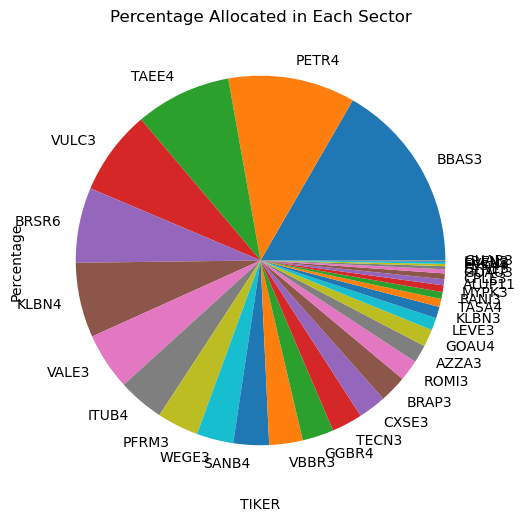

In [6]:


#create a chart using df dataframe to show the percentage alocated in each Tiker
import matplotlib.pyplot as plt
#print(df)

sector_data = df_grouped.groupby('TIKER')['PERCENTUAL'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sector_data.plot(kind='pie')
plt.title('Percentage Allocated in Each Sector')
plt.xlabel('TIKER')
plt.ylabel('Percentage')
plt.show()




# Call Gemini

In [ ]:

import google.generativeai as genai


# Configure your API key
# Get one at https://aistudio.google.com/
import os


genai.configure(api_key=os.environ["API_KEY"])

def analyze_portfolio(file_path):
    # 1. Read the CSV file
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            csv_content = f.read()
    except FileNotFoundError:
        return "Error: CSV file not found."
    
    # 2. Read the HTML structure file
    html_file_path = '/home/ponche/projects/ibox/reports/KimiReport.html'
    try:
        with open(html_file_path, 'r', encoding='utf-8') as f:
            html_content = f.read()
    except FileNotFoundError:
        return "Error: Html file not found."
    

    # 3. Define the analysis prompt
    
  
    #- Use Tailwind CSS classes for styling.
    #- Show top 10 current alocations and percentage of allocation for summary of the top 10.
    
    prompt = f"""
    You are an expert financial analyst AI tasked with creating a portfolio review.
    I am providing you with my stock portfolio data in CSV format. The 'PERCENTUAL' column represents the allocation percentage.

    Your task is to analyze this data and generate a comprehensive investment report in HTML format.

    **Crucially, you must prioritize your analysis on the stocks with the highest allocation percentages.**

    Here are the analysis criteria:

    1.  **High-Risk Stocks to Consider Selling:** Identify stocks with financial distress or overvaluation (Negative P/L, Negative EPS, High Debt, Negative Growth).
    2.  **Stocks to Buy/Keep for Dividends:** Identify attractive dividend payers (High Yield > 5%, Sustainable P/L).
    3.  **Stocks with High Growth Potential:** Identify undervalued stocks with strong fundamentals (Fair Value > Price, ROE > 15%, Positive Growth).

    **Output Requirements:**
    - Generate the complete, raw HTML code for this report.
    - Output the result in a single code block.
    - Do not include conversational text; provide only the HTML and CSS.
    - Output should be a HTML page like this one: {html_file_path}
    - HTML report should should use almost all space on a wide monitor, using nigh like format.
    - Create three distinct sections: High-Risk, Dividends, Growth. For each section, order by the impact of the advise.
    - Prioritize risk analysis on the top allocated stocks.
    - Each section must have a table with columns: "Ticker", "Sector", "Current Percentage" ,"Current Price", "Key Metric", "Justification", "Suggested Allocation".
    - In the "Ticker" column, hyperlink the symbol to MSNFundamentus: https://www.fundamentus.com.br/detalhes.php?papel=TICKER
    - Provide concrete "Suggested Allocation" advice.
    - Be careful on "consistent growth" metric when negative there is no growth.
    - Try to add these columns: ticker,Sector,Current,Percentage,Current Price,Key Metric,Justification,Suggested Allocation


    Here is the CSV data:
    - csv file decimal separator is dot(.) and thousands separator is comma(,).
    ---
    {csv_content}
    ---
    """

    # 3. Call the Gemini API
    print(f"Analyzing {file_path} with Gemini...")
    model = genai.GenerativeModel('gemini-flash-latest')
    #model = genai.GenerativeModel('gemini-2.5-flash')
    #model = genai.GenerativeModel('gemini-2.5-pro')
    
    
    try:
        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        return f"Error analyzing portfolio: {str(e)}"

if __name__ == "__main__":
    # Replace with your CSV file path
    csv_file = "/home/ponche/projects/ibox/results/tikers_grouped.csv" 
    
    # Generate the report
    html_report = analyze_portfolio(csv_file)
    
    # Clean up markdown code blocks if present
    if html_report.startswith('```html'):
        html_report = html_report[7:-3].strip()
    elif html_report.startswith('```'):
        html_report = html_report[3:-3].strip()

    # Save to file
    output_file = '/home/ponche/projects/ibox/reports/report.html'
    with open(output_file, "w", encoding='utf-8') as f:
        # Wrap in a basic HTML structure for viewing
        full_html = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <title>Portfolio Analysis</title>
            <script src="https://cdn.tailwindcss.com"></script>
        </head>
        <body class="bg-gray-100 p-8">
            <div class="max-w-4xl mx-auto">
                {html_report}
            </div>
        </body>
        </html>
        """
        f.write(full_html)
    
    print(f"Analysis complete! Report saved to {output_file}")
    




/tmp/ipykernel_173111/2756884827.py:1: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


Analyzing /home/ponche/projects/ibox/results/tikers_grouped.csv with Gemini...
Analysis complete! Report saved to /home/ponche/projects/ibox/reports/report.html


# Display report here as well

In [8]:
from IPython.display import display, HTML
display(HTML(html_report))


Ticker,Sector,Current Percentage,Current Price,Key Metric,Justification,Suggested Allocation
WEGE3,Máquinas e Equipamentos,3.21%,46.32,P/L: 29.99 (FV: 13.60),Extreme Overvaluation. The current price is over 3x the calculated Fair Value (13.60) and the P/L ratio (30x) is unsustainable given the growth rate (16.2%) for this industrial sector.,Reduce to 0% (SELL)
KLBN4,Madeira e Papel,6.55%,3.72,Dívida/Patrimônio: 3.5,"High Allocation + High Debt. The D/P ratio is elevated (3.5), posing significant financial risk. Combined with slight overvaluation (3.72 vs FV 3.33) and modest revenue growth (6.1%), the risk outweighs the stability.",Reduce by 50% (to 3.3%)
CXSE3,Previdência e Seguros,2.44%,16.16,P/VP: 3.59,"Extreme Operational Distress Indicators (EV/EBITDA -340) despite moderate P/L. High Price/Book Value suggests overvaluation relative to assets, driven by potential instability or sector specific risks.",Reduce to 0% (SELL)
LEVE3,Automóveis e Motocicletas,1.08%,34.28,Dívida/Patrimônio: 1.71,"Overvalued (Price 34.28 vs FV 25.02) and carrying high debt (1.71 D/P). Capital could be better deployed in less leveraged, undervalued opportunities.",Reduce to 0%
Ticker,Sector,Current Percentage,Current Price,Key Metric,Justification,Suggested Allocation
BBAS3,Intermediários Financeiros,16.68%,21.37,P/L: 5.67 (FV: 51.35),"Core Holding (Highest Allocation). Extremely low valuation metrics combined with a solid 5.5% yield. Offers stability, predictable income, and massive capital appreciation potential due to undervaluation.",Maintain/Increase (Core Holding)
PETR4,"Petróleo, Gás",11.12%,32.04,Dividend Yield: 10.1%,Exceptional Value + Yield. Strong yield backed by robust ROE (18.3%) and extremely low P/L (5.33). Severe undervaluation (FV 66.61) suggests strong total return potential.,Maintain
TAEE4,Energia Elétrica,8.38%,13.25,ROE: 22.5%,Defensive Anchor. High allocation to a stable utility. Consistent profitability (ROE 22.5%) ensures the 8.1% yield is highly reliable. Excellent for portfolio stability.,Maintain
BRSR6,Intermediários Financeiros,6.58%,16.33,Dividend Yield: 9.8%,Regional Bank Value. High dividend yield combined with very low P/L (5.42). Provides significant income stream and remains highly undervalued (FV 42.44).,Maintain
Ticker,Sector,Current Percentage,Current Price,Key Metric,Justification,Suggested Allocation
